In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, 'E:\\dev\\packages')
from GANs import utils

In [2]:
domainA_dir = 'E:\\dev\\GANs\\horse2zebra\\trainA' #horse
domainB_dir = 'E:\\dev\\GANs\\horse2zebra\\trainB' #zebra

In [3]:
dataA = utils.load_images_in_shape(domainA_dir, target_size=(256,256))
dataB = utils.load_images_in_shape(domainB_dir, target_size=(256,256))

Found 1067 files in the directory


  0%|          | 0/1067 [00:00<?, ?it/s]

100%|██████████| 1067/1067 [00:05<00:00, 178.08it/s]


Loaded (1067, 256, 256, 3) images
Found 1334 files in the directory


100%|██████████| 1334/1334 [00:07<00:00, 179.04it/s]


Loaded (1334, 256, 256, 3) images


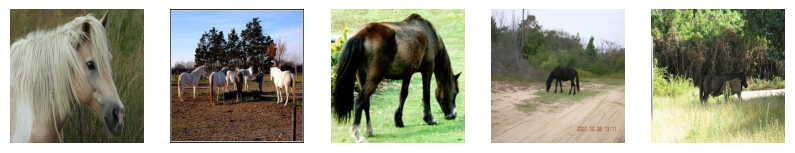

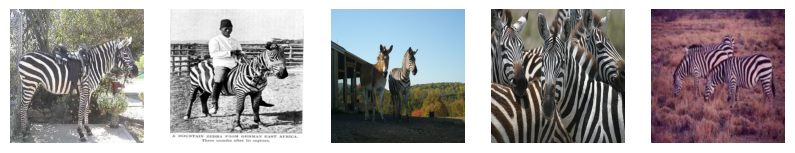

In [4]:
idxA = np.random.randint(0, len(dataA), 5)
idxB = np.random.randint(0, len(dataB), 5)

plt.figure(figsize=(10,5))
for i, idx in enumerate(idxA):
    plt.subplot(1, 5, 1 + i)
    plt.axis('off')
    plt.imshow(dataA[idx].astype('uint8'))
plt.show()
plt.figure(figsize=(10,5))
for i, idx in enumerate(idxB):
    plt.subplot(1, 5, 1 + i)
    plt.axis('off')
    plt.imshow(dataB[idx].astype('uint8'))
plt.show()

In [5]:
dataA = utils.scale_data(dataA)
dataB = utils.scale_data(dataB)

In [6]:
from GANs.cycleGAN import models

In [7]:
image_shape = dataA.shape[1:]
gen_A2B = models.build_generator(input_shape=image_shape)
gen_B2A = models.build_generator(input_shape=image_shape)

disc_A = models.build_discriminator(input_shape=image_shape)
disc_B = models.build_discriminator(input_shape=image_shape)

cganA2B = models.build_cycleGAN(gen_A2B, disc_B, gen_B2A, input_shape=image_shape)
cganB2A = models.build_cycleGAN(gen_B2A, disc_A, gen_A2B, input_shape=image_shape)

In [ ]:
history = models.train_cycleGAN(disc_A, disc_B, gen_A2B, gen_B2A, cganA2B, cganB2A, dataA, dataB, summary_interval=2)

In [9]:
from keras.models import load_model

In [13]:
cust = {'InstanceNormalization': utils.InstanceNormalization}

In [171]:
modelA2B = load_model('GenA2B_after_10669.h5', cust)
modelB2A = load_model('GenB2A_after_10669.h5', cust)

1/1 [==============================] - 0s 20ms/step


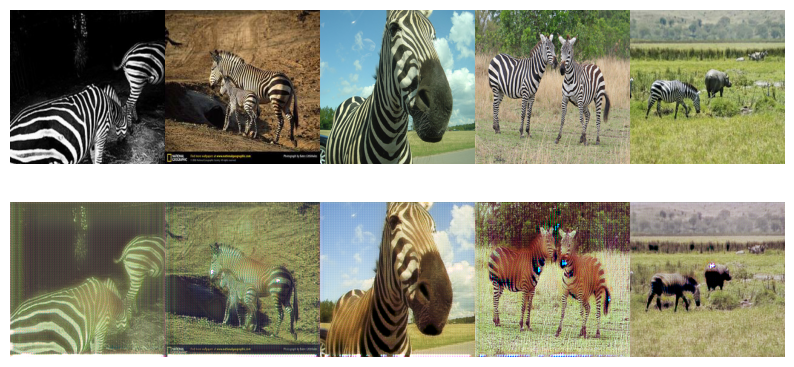

In [308]:
sample_size = 5
idx = np.random.randint(0, len(dataB), sample_size)
X = dataB[idx]
X_gen = modelB2A.predict(X)

# scaling the image to be ploted 
X = (X + 1)/ 2.0
X_gen = (X_gen + 1)/ 2.0

# ploting the images 
plt.figure(figsize=(sample_size*2, sample_size))
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(sample_size):
    plt.subplot(2, sample_size, i+1)
    plt.axis('off')
    if X.shape[3] == 1:
        plt.imshow(X[i], cmap='gray')
    else:
        plt.imshow(X[i])
    
    plt.subplot(2, sample_size, sample_size+1+i)
    plt.axis('off')
    if X.shape[3] == 1:
        plt.imshow(X_gen[i], cmap='gray')
    else:
        plt.imshow(X_gen[i])
plt.savefig('something.png')

